In [1]:
# Import the necessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
#Loading in Dataset
League = pd.read_csv('2021_LoL_esports_match_data_from_OraclesElixir_20210828.csv')

# Dropping any 'partial' data points
print(pd.unique(League.datacompleteness))
League = League[League['datacompleteness'] == 'complete']
print(pd.unique(League.datacompleteness))


['complete' 'partial']
['complete']


In [3]:
# Leagues present in dataset
pd.unique(League.league)

array(['KeSPA', 'LPL', 'CU', 'GLL', 'BL', 'RCL', 'DL', 'LDL', 'LCK',
       'PGN', 'UKLC', 'LCS', 'CBLOL', 'LCK CL', 'SL', 'UL', 'PRM', 'LFL',
       'NLC', 'CBLOL.A', 'LCS.A', 'TRA', 'UPL', 'VCS', 'LEC', 'LJL',
       'TCL', 'OTBLX', 'EBL', 'LPLOL', 'BIG', 'BM', 'HM', 'LHE', 'LMF',
       'LLA', 'HC', 'LCL', 'PCS', 'UGP', 'LCO', 'GSG', 'AOL', 'NERD',
       'EM', 'MSI', 'EGL'], dtype=object)

In [4]:
# Setting League as just LCS
lcs = League[League['league'] == 'LCS']

# Removing all players who played less than 5 games
for player in pd.unique(lcs['player']):
    if len(lcs[lcs['player']==player]) < 5:
        lcs = lcs.drop(lcs[lcs['player']==player].index)

# Make Spring and Summer dataframes
lcsSpring = lcs[lcs['split']=='Spring']

lcsSummer = lcs[lcs['split']=='Summer']

In [5]:
lcsSpring

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2460,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,...,129.0,334.0,-603.0,-14.0,2.0,1.0,0.0,1.0,0.0,2.0
2461,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,...,117.0,172.0,-1076.0,-17.0,0.0,3.0,0.0,0.0,1.0,1.0
2462,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,...,121.0,1486.0,476.0,15.0,1.0,2.0,1.0,0.0,1.0,1.0
2463,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,...,120.0,1755.0,1087.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
2464,ESPORTSTMNT03/1671978,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-01-15 23:10:17,1,11.01,...,19.0,597.0,170.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61039,ESPORTSTMNT02/1810483,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-04-12 01:19:15,5,11.05,...,141.0,547.0,-633.0,-23.0,3.0,1.0,0.0,0.0,1.0,0.0
61040,ESPORTSTMNT02/1810483,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-04-12 01:19:15,5,11.05,...,148.0,396.0,-147.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0
61041,ESPORTSTMNT02/1810483,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-04-12 01:19:15,5,11.05,...,21.0,70.0,837.0,-2.0,0.0,2.0,0.0,0.0,0.0,1.0
61042,ESPORTSTMNT02/1810483,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2021,Spring,1,2021-04-12 01:19:15,5,11.05,...,525.0,-1805.0,-490.0,1.0,1.0,1.0,5.0,5.0,7.0,2.0


In [6]:
lcs[lcs['champion']=='Aatrox'].groupby('champion').agg({'result':'mean'}).sort_values('result')

,result
champion,
Aatrox,0.434783


In [7]:
# Making a dataframe of champion picks during Spring Split
test = lcs[lcs['split']=='Spring'].champion.value_counts()
test = test.to_frame()
test = test.rename(columns={"champion": "SpringPicks"})

# Making a dataframe of champion picks during Summer Split
test2 = lcs[lcs['split']=='Summer'].champion.value_counts()
test2 = test2.to_frame()
test2 = test2.rename(columns={"champion": "SummerPicks"})

# Joining the two data frames
SplitPicks = test.join(test2,how='outer')

# Fill NAN as 0 picks
SplitPicks = SplitPicks.fillna(0)
# Quick formula to calculate percent change
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

SplitPicks['Pick Difference'] = percentage_change(SplitPicks['SpringPicks'],SplitPicks['SummerPicks'])


# Reseting Index to make 'champion' a column
SplitPicks = SplitPicks.reset_index().rename(columns={"index":"Champion"})

In [8]:
np.sort(pd.unique(lcs['champion'].astype(str)))


array(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Annie', 'Aphelios', 'Ashe',
       'Azir', 'Bard', 'Blitzcrank', 'Braum', 'Caitlyn', 'Camille',
       'Cassiopeia', "Cho'Gath", 'Corki', 'Darius', 'Diana', 'Dr. Mundo',
       'Draven', 'Ekko', 'Elise', 'Ezreal', 'Fiddlesticks', 'Fiora',
       'Galio', 'Gangplank', 'Gnar', 'Gragas', 'Graves', 'Gwen',
       'Hecarim', 'Irelia', 'Ivern', 'Janna', 'Jarvan IV', 'Jax', 'Jayce',
       'Jhin', 'Jinx', "Kai'Sa", 'Kalista', 'Karma', 'Karthus',
       'Kassadin', 'Kayn', 'Kennen', "Kha'Zix", 'Kindred', 'Kled',
       "Kog'Maw", 'LeBlanc', 'Lee Sin', 'Leona', 'Lillia', 'Lissandra',
       'Lucian', 'Lulu', 'Malphite', 'Malzahar', 'Maokai', 'Miss Fortune',
       'Mordekaiser', 'Morgana', 'Nautilus', 'Neeko', 'Nidalee',
       'Nocturne', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Qiyana',
       'Quinn', 'Rakan', "Rek'Sai", 'Rell', 'Renekton', 'Rengar',
       'Rumble', 'Ryze', 'Samira', 'Sejuani', 'Senna', 'Seraphine',
       'Sett', 'Shen', 'Singed

In [9]:
# Create a list of Win Rates in specific Splits then Join that thoses lists into the SplitPicks DataFrame
springWin = lcsSpring.groupby('champion')['result'].mean()
summerWin = lcsSummer.groupby('champion')['result'].mean()

springWin = springWin.to_frame()
summerWin = summerWin.to_frame()

springWin = springWin.reset_index()
summerWin = summerWin.reset_index()
springWin = springWin.rename(columns={"champion": "Champion",'result':'SpringResult'})
summerWin = summerWin.rename(columns={"champion": "Champion",'result':'SummerResult'})

SplitPicks = SplitPicks.merge(springWin,on='Champion')
SplitPicks = SplitPicks.merge(summerWin,on='Champion')
SplitPicks['Win Difference'] = percentage_change(SplitPicks['SpringResult'],SplitPicks['SummerResult'])

# Rearranging Columns
SplitPicks = SplitPicks[["Champion","SpringPicks","SpringResult","SummerPicks","SummerResult","Win Difference","Pick Difference"]]

<AxesSubplot:xlabel='SpringPicks', ylabel='SummerPicks'>

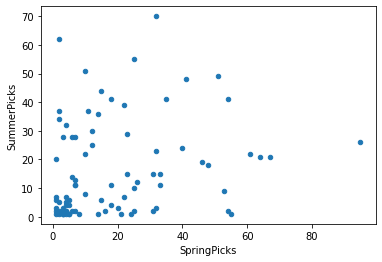

In [10]:
SplitPicks.plot(x='SpringPicks',y='SummerPicks',kind='scatter')

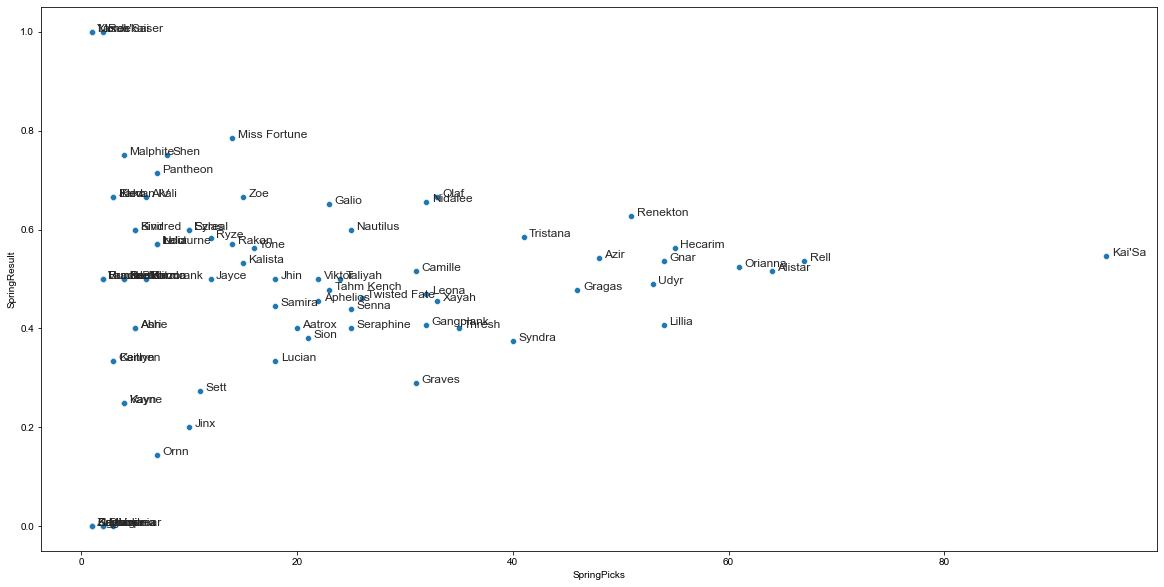

In [11]:
# Plotting Scatterplot
fig, ax = plt.subplots(figsize=(20,10))
sb.set(style="ticks")
sb.set_style("white")
sb.scatterplot(ax=ax, data=SplitPicks, x='SpringPicks',y='SpringResult')
# add labels here
for v in SplitPicks.iterrows():
    plt.text(v[1][1]+0.5, v[1][2], f'{v[1][0]}')


In [12]:
SplitPicks.to_csv('SplitPicks.csv')

In [14]:
len(pd.unique(League['gameid']))

9534

In [42]:
League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()

<ipython-input-42-26b3a5554d74>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()


,infernals,mountains,clouds,oceans
league,,,,
AOL,21.0,25.0,21.0,27.0
BIG,82.0,79.0,86.0,100.0
BL,62.0,59.0,73.0,90.0
BM,76.0,61.0,56.0,57.0
CBLOL,158.0,141.0,142.0,126.0
CBLOL.A,154.0,169.0,138.0,177.0
CU,137.0,110.0,120.0,138.0
DL,84.0,65.0,66.0,60.0
EBL,100.0,86.0,84.0,106.0


In [63]:
drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()
drakesouls = drakes[drakes>1]
drakesouls = drakesouls.notnull().astype('int')
leaguesouls = drakesouls.groupby('league').sum()
leaguesouls = leaguesouls.reset_index()

<ipython-input-63-8774cabe6633>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()


infernals  mountains  clouds  oceans
league gameid                                                     
AOL    ESPORTSTMNT02/1724137        NaN        NaN     NaN     NaN
       ESPORTSTMNT02/1724598        2.0        NaN     NaN     NaN
       ESPORTSTMNT02/1724617        NaN        NaN     NaN     NaN
       ESPORTSTMNT02/1724636        NaN        NaN     NaN     2.0
       ESPORTSTMNT02/1724643        NaN        3.0     NaN     NaN
...                                 ...        ...     ...     ...
VCS    ESPORTSTMNT04/1610418        NaN        NaN     NaN     2.0
       ESPORTSTMNT04/1610421        4.0        NaN     NaN     NaN
       ESPORTSTMNT04/1610436        NaN        2.0     NaN     NaN
       ESPORTSTMNT04/1610437        3.0        NaN     NaN     NaN
       ESPORTSTMNT04/1610438        NaN        NaN     NaN     3.0

[9533 rows x 4 columns]

<AxesSubplot:>

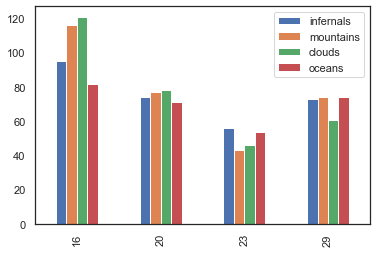

In [105]:
leaguesouls[(leaguesouls['league']=='LCK')|(leaguesouls['league']=='LPL')|(leaguesouls['league']=='LCS')|(leaguesouls['league']=='LEC')].plot(kind='bar')